## 4 Simulation experiments on the impact of $L$ and strategies
### 4.2 Strategies study

In [1]:
import os
path_y = os.getcwd() + '/results/y/'
path_true_x = os.getcwd() + '/results/true_x/'
path_res = os.getcwd() + '/results/res/'

os.chdir('../')
from inference_mahmm import *

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm 

palette = sns.color_palette("tab10", 10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Results recuperation

In [2]:
Σ, seeds, L = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1], np.arange(1000), [0, 2, 5, 8, 10]
fees = [0, 0.0005, 0.001, 0.002]

In [3]:
def max_drawdown(prices):
    cumulative_max = prices.cummax()
    drawdowns = (prices - cumulative_max) / cumulative_max
    return drawdowns.min(skipna=True)  

mdd, mdd_c = np.zeros((len(Σ), len(seeds), len(L), len(fees))), np.zeros((len(Σ), len(seeds), len(L), len(fees)))

for si, σ in enumerate(Σ):
    for seedi, seed in tqdm(enumerate(seeds)):
        
        y = np.asarray(np.load(path_y + 'y_sigma' + str(σ) + '_' + str(seed) + '.npy', 'r'))
        true_x = np.asarray(np.load(path_true_x + 'true_x_' + str(seed) + '.npy', 'r'))
        
        for li, l in enumerate(L):
            with open(path_res + 'res_up_L' + str(l) + '_sigma' + str(σ) + '_' + str(seed) + '.pickle', 'rb') as handle:
                res = pickle.load(handle)
                
            x_c = res['x_c']
            x = res['x_b']

            if res['M'][1] > 0:
                x[x == 1] = 2
            else:
                x[x == 1] = 0
        
            for fi, fee in enumerate(fees):
                strat = pd.DataFrame(get_strat(x=x, fees=fee, risky=y[-len(x):]/100, riskfree=np.zeros(len(x)), nominal=100, type_strat='average')[1])
                cum_strat = (1 + strat).cumprod()
                mdd[si, seedi, li, fi] = np.abs(max_drawdown(cum_strat))

                strat = pd.DataFrame(get_strat(x=x_c, fees=fee, risky=y[-len(x):]/100, riskfree=np.zeros(len(x)), nominal=100, type_strat='average')[1])
                cum_strat = (1 + strat).cumprod()
                mdd_c[si, seedi, li, fi] = np.abs(max_drawdown(cum_strat))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

##### Binary signal

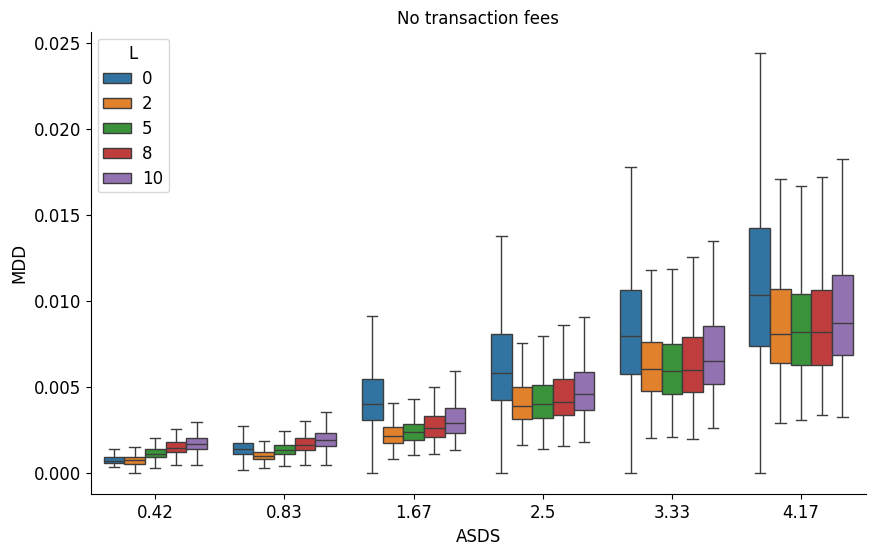

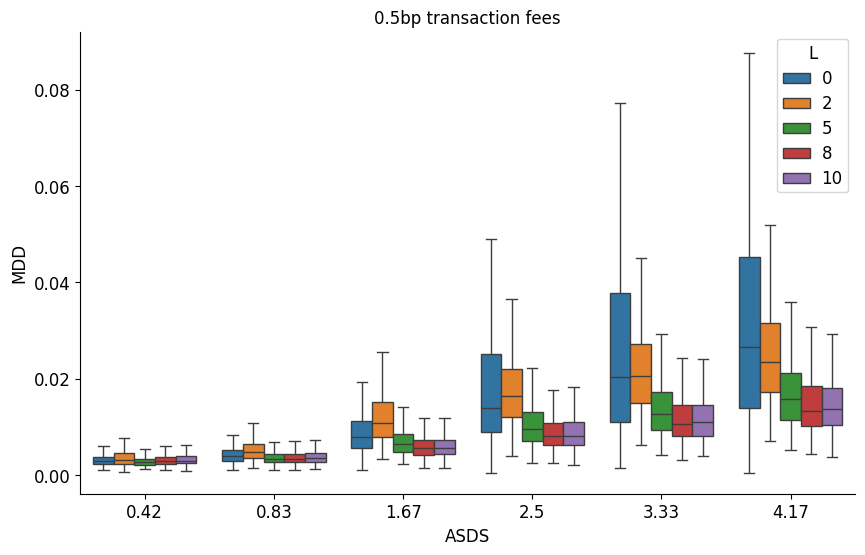

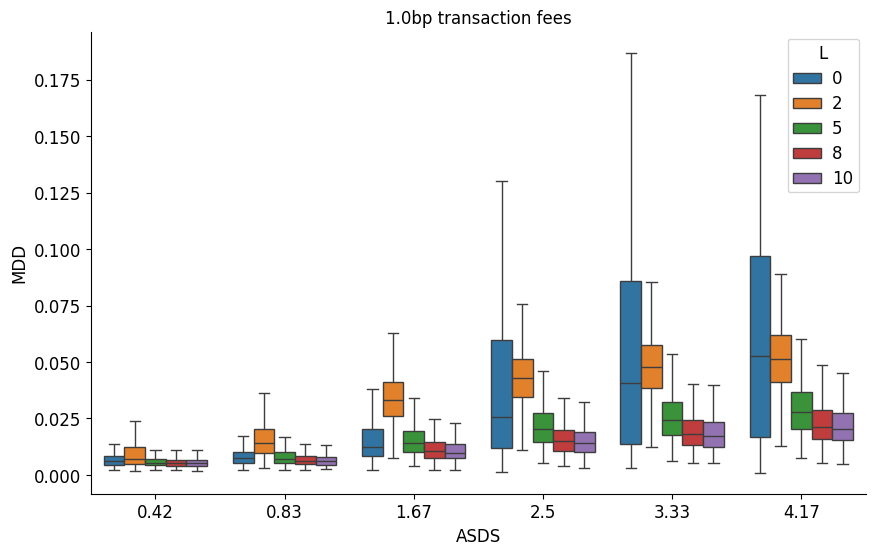

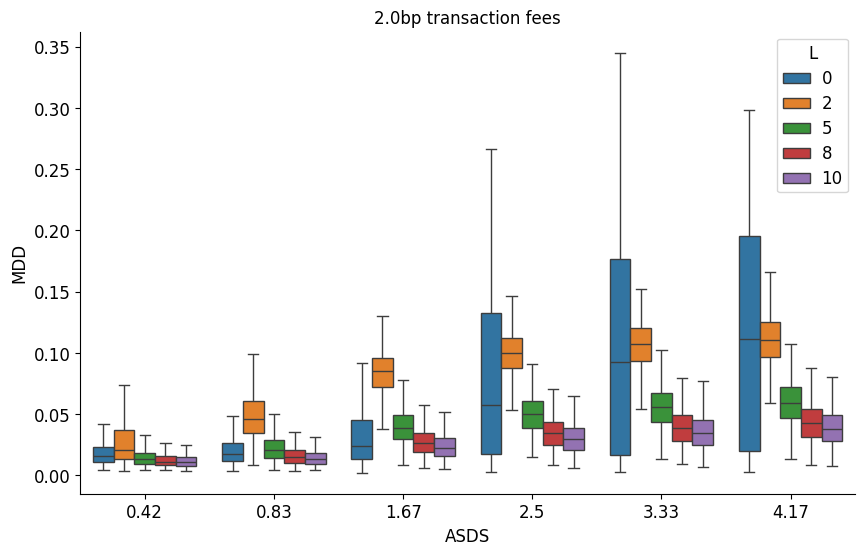

In [4]:
for fi, fee in enumerate(fees):
    df_melted = pd.DataFrame([[l, σ, mdd[si, seedi, li][fi]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
    df_melted.columns = ['L', 'Sigma', 'Value']
    df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

    fig, ax = plt.subplots(figsize=(10, 6))
    gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)
    plt.setp(gfg.get_legend().get_texts(), fontsize='12')  
    plt.setp(gfg.get_legend().get_title(), fontsize='12')  
    gfg.tick_params(labelsize=12)
    
    plt.xlabel("ASDS", fontsize='12')
    plt.ylabel('MDD', fontsize='12')
    
    if fi>0: plt.title(f'{fee*1000}bp transaction fees')
    else: plt.title('No transaction fees')
    
    sns.despine()
    plt.show()

##### Continuous signal

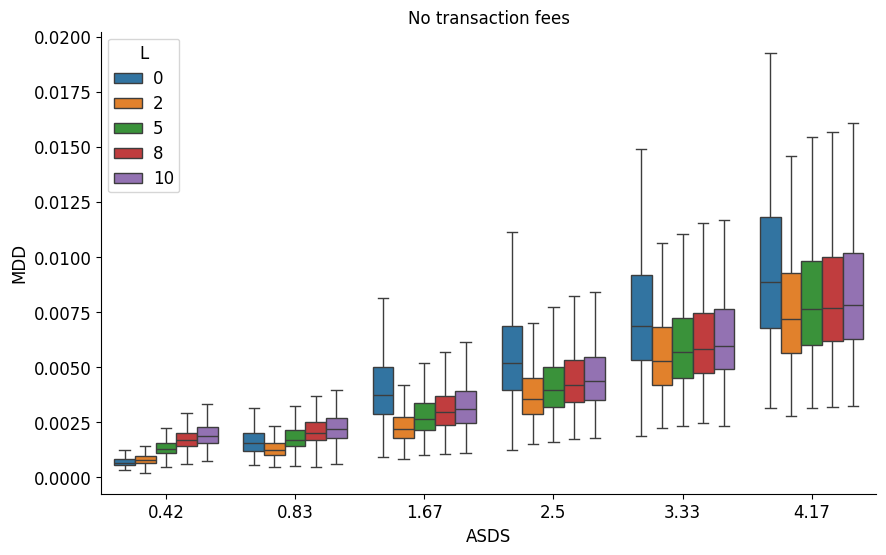

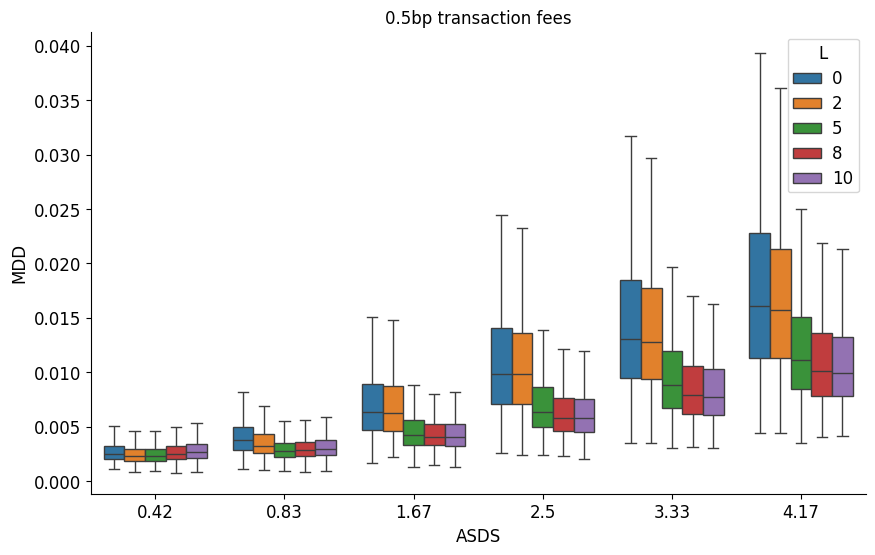

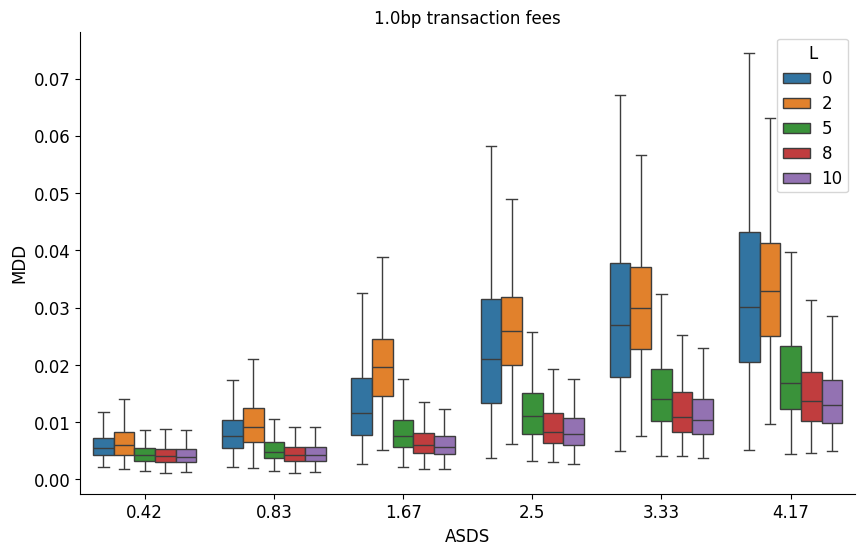

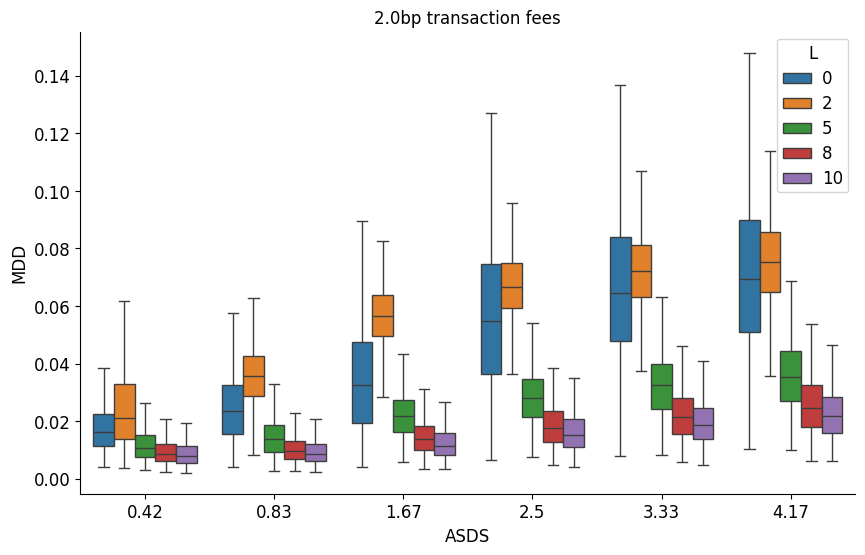

In [5]:
for fi, fee in enumerate(fees):
    df_melted = pd.DataFrame([[l, σ, mdd_c[si, seedi, li][fi]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
    df_melted.columns = ['L', 'Sigma', 'Value']
    df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

    fig, ax = plt.subplots(figsize=(10, 6))
    gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)
    plt.setp(gfg.get_legend().get_texts(), fontsize='12')  
    plt.setp(gfg.get_legend().get_title(), fontsize='12')  
    gfg.tick_params(labelsize=12)
    
    plt.xlabel("ASDS", fontsize='12')
    plt.ylabel('MDD', fontsize='12')
    
    if fi>0: plt.title(f'{fee*1000}bp transaction fees')
    else: plt.title('No transaction fees')
    
    sns.despine()
    plt.show()